# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [2]:
genome_ids =['NA19717', 'NA19676', 'NA19649', 'NA19722', 'NA19648', 'NA19764', 'NA19752', 'NA19780', 'NA19756', 'NA19734', 'NA19658', 'NA19762', 'NA19723', 'NA19789', 'NA19774', 'NA19682', 'NA19741', 'NA19670', 'NA19776', 'NA19651', 'NA19654', 'NA19792', 'NA19794', 'NA19782', 'NA19788', 'NA19669', 'NA19664', 'NA19679', 'NA19759', 'NA19720', 'NA19783', 'NA19725', 'NA19795', 'NA19777', 'NA19761', 'NA19749', 'NA19729', 'NA19728', 'NA19740', 'NA19735', 'NA19758', 'NA19770', 'NA19747', 'NA19750', 'NA19771', 'NA19755', 'NA19731', 'NA19655', 'NA19779', 'NA19726', 'NA19678', 'NA19652', 'NA19719', 'NA19773', 'NA19684', 'NA19657', 'NA19663', 'NA19716', 'NA19786', 'NA19746', 'NA19785', 'NA19681', 'NA19732']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

In [5]:
infile = join(root_dir,"output/MXL/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/MXL/all.csv'

In [6]:
df = pd.read_csv(infile)

In [7]:
df = df[genome_ids + ['gene']]
df.head()

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19684,NA19657,NA19663,NA19716,NA19786,NA19746,NA19785,NA19681,NA19732,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [8]:
sdf=df.groupby(["gene"]).sum()

In [9]:
sdf.head()

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19773,NA19684,NA19657,NA19663,NA19716,NA19786,NA19746,NA19785,NA19681,NA19732
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,35,46,8,7,10,8,33,4,5,...,3,35,34,31,3,2,1,5,36,2
ANG,8,9,1,3,2,0,1,5,1,10,...,9,9,9,9,4,9,2,2,2,5
ATXN2,13,11,9,155,8,17,20,14,11,12,...,10,7,17,11,14,17,16,1,2,11
C19ORF12,13,14,18,6,9,13,7,7,10,11,...,11,7,4,7,11,9,8,11,13,8
C9ORF72,14,25,1,36,29,35,23,13,12,14,...,10,16,13,12,35,13,20,1,13,26


## Compute mean99

In [10]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [11]:
mean99.head()

,0
NA19717,10.393939
NA19676,13.060606
NA19649,11.434343
NA19722,13.828283
NA19648,13.101010


In [12]:
m99 = mean99.transpose()

In [13]:
m99

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19773,NA19684,NA19657,NA19663,NA19716,NA19786,NA19746,NA19785,NA19681,NA19732
0,10.393939,13.060606,11.434343,13.828283,13.10101,12.69697,11.979798,12.363636,9.959596,13.464646,...,8.868687,12.888889,13.545455,15.131313,13.464646,8.333333,11.242424,13.171717,11.141414,5.959596


## Name the row "mean99" to append to the dataframe 

In [14]:
m99.index=["mean99"]

In [15]:
m99.head()

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19773,NA19684,NA19657,NA19663,NA19716,NA19786,NA19746,NA19785,NA19681,NA19732
mean99,10.393939,13.060606,11.434343,13.828283,13.10101,12.69697,11.979798,12.363636,9.959596,13.464646,...,8.868687,12.888889,13.545455,15.131313,13.464646,8.333333,11.242424,13.171717,11.141414,5.959596


## Compute statistics per genome, across all genes

In [16]:
genome_stats= sdf.describe()

In [17]:
genome_stats.head()

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19773,NA19684,NA19657,NA19663,NA19716,NA19786,NA19746,NA19785,NA19681,NA19732
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,28.583333,35.916667,31.444444,38.027778,36.027778,34.916667,32.944444,34.000000,27.388889,37.027778,...,24.388889,35.444444,37.250000,41.611111,37.027778,22.916667,30.916667,36.222222,30.638889,16.388889
std,102.910329,146.953904,129.226146,132.628048,159.096823,128.793606,105.124673,140.079365,73.845893,148.214225,...,100.950986,146.103377,156.905681,174.668548,161.021114,48.987681,128.729034,164.230867,89.403468,33.856232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.750000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.750000,1.750000,...,1.000000,1.750000,2.000000,2.000000,1.750000,2.000000,1.000000,1.000000,1.750000,1.750000


### Adding new rows for genomes to show variant statistics

In [18]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [19]:
genome_stats_df

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19773,NA19684,NA19657,NA19663,NA19716,NA19786,NA19746,NA19785,NA19681,NA19732
ALS2,36.000000,35.000000,46.000000,8.000000,7.000000,10.000000,8.000000,33.000000,4.000000,5.000000,...,3.000000,35.000000,34.000000,31.000000,3.000000,2.000000,1.000000,5.000000,36.000000,2.000000
ANG,8.000000,9.000000,1.000000,3.000000,2.000000,0.000000,1.000000,5.000000,1.000000,10.000000,...,9.000000,9.000000,9.000000,9.000000,4.000000,9.000000,2.000000,2.000000,2.000000,5.000000
ATXN2,13.000000,11.000000,9.000000,155.000000,8.000000,17.000000,20.000000,14.000000,11.000000,12.000000,...,10.000000,7.000000,17.000000,11.000000,14.000000,17.000000,16.000000,1.000000,2.000000,11.000000
C19ORF12,13.000000,14.000000,18.000000,6.000000,9.000000,13.000000,7.000000,7.000000,10.000000,11.000000,...,11.000000,7.000000,4.000000,7.000000,11.000000,9.000000,8.000000,11.000000,13.000000,8.000000
C9ORF72,14.000000,25.000000,1.000000,36.000000,29.000000,35.000000,23.000000,13.000000,12.000000,14.000000,...,10.000000,16.000000,13.000000,12.000000,35.000000,13.000000,20.000000,1.000000,13.000000,26.000000
CHCHD10,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000
CHMP2B,5.000000,13.000000,10.000000,1.000000,9.000000,12.000000,5.000000,1.000000,11.000000,5.000000,...,15.000000,11.000000,4.000000,2.000000,6.000000,10.000000,10.000000,0.000000,12.000000,1.000000
CHRNA3,1.000000,28.000000,28.000000,17.000000,13.000000,24.000000,19.000000,15.000000,0.000000,17.000000,...,17.000000,19.000000,24.000000,6.000000,19.000000,5.000000,13.000000,2.000000,18.000000,2.000000
CREST,5.000000,0.000000,5.000000,86.000000,2.000000,2.000000,1.000000,5.000000,5.000000,82.000000,...,6.000000,4.000000,4.000000,8.000000,1.000000,0.000000,2.000000,3.000000,60.000000,4.000000
DAO,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,2.000000,4.000000,8.000000,4.000000,...,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,1.000000,4.000000,2.000000,2.000000


### Compute per gene stats

In [20]:
gene_df = sdf.transpose().describe()

In [21]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,63.0,11.761905,13.256422,0.0,2.5,5.0,20.0,46.0
ANG,63.0,5.158730,3.939897,0.0,2.0,4.0,9.0,17.0
ATXN2,63.0,25.873016,44.481418,1.0,9.0,11.0,17.0,165.0
C19ORF12,63.0,8.904762,3.485982,0.0,7.0,9.0,11.0,18.0
C9ORF72,63.0,16.968254,9.368734,1.0,12.0,15.0,23.0,36.0
CHCHD10,63.0,1.301587,0.795855,0.0,1.0,1.0,1.5,3.0
CHMP2B,63.0,7.714286,5.256113,0.0,2.5,10.0,12.0,18.0
CHRNA3,63.0,13.412698,7.768080,0.0,6.0,15.0,18.0,28.0
CREST,63.0,18.111111,31.443811,0.0,2.0,4.0,13.0,137.0


In [22]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [23]:
rdf.head()

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19681,NA19732,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,35,46,8,7,10,8,33,4,5,...,36,2,63.0,11.761905,13.256422,0.0,2.5,5.0,20.0,46.0
ANG,8,9,1,3,2,0,1,5,1,10,...,2,5,63.0,5.158730,3.939897,0.0,2.0,4.0,9.0,17.0
ATXN2,13,11,9,155,8,17,20,14,11,12,...,2,11,63.0,25.873016,44.481418,1.0,9.0,11.0,17.0,165.0
C19ORF12,13,14,18,6,9,13,7,7,10,11,...,13,8,63.0,8.904762,3.485982,0.0,7.0,9.0,11.0,18.0
C9ORF72,14,25,1,36,29,35,23,13,12,14,...,13,26,63.0,16.968254,9.368734,1.0,12.0,15.0,23.0,36.0


In [24]:
rdf

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19681,NA19732,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,35,46,8,7,10,8,33,4,5,...,36,2,63.0,11.761905,13.256422,0.0,2.5,5.0,20.0,46.0
ANG,8,9,1,3,2,0,1,5,1,10,...,2,5,63.0,5.158730,3.939897,0.0,2.0,4.0,9.0,17.0
ATXN2,13,11,9,155,8,17,20,14,11,12,...,2,11,63.0,25.873016,44.481418,1.0,9.0,11.0,17.0,165.0
C19ORF12,13,14,18,6,9,13,7,7,10,11,...,13,8,63.0,8.904762,3.485982,0.0,7.0,9.0,11.0,18.0
C9ORF72,14,25,1,36,29,35,23,13,12,14,...,13,26,63.0,16.968254,9.368734,1.0,12.0,15.0,23.0,36.0
CHCHD10,0,1,2,1,1,0,3,2,1,1,...,1,1,63.0,1.301587,0.795855,0.0,1.0,1.0,1.5,3.0
CHMP2B,5,13,10,1,9,12,5,1,11,5,...,12,1,63.0,7.714286,5.256113,0.0,2.5,10.0,12.0,18.0
CHRNA3,1,28,28,17,13,24,19,15,0,17,...,18,2,63.0,13.412698,7.768080,0.0,6.0,15.0,18.0,28.0
CREST,5,0,5,86,2,2,1,5,5,82,...,60,4,63.0,18.111111,31.443811,0.0,2.0,4.0,13.0,137.0


# Plot bar chart of total variant counts per gene


In [25]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [26]:
gdf=df.groupby(["gene"]).count()

In [27]:
gdf

,POS
gene,
ALS2,207
ANG,54
ATXN2,377
C19ORF12,66
C9ORF72,120
CHCHD10,9
CHMP2B,54
CHRNA3,84
CREST,251


In [28]:
gdf.reset_index(inplace=True)

In [29]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [30]:
gdf

,gene,variant_count
0,ERBB4,4920
1,NEK1,711
2,FIG4,438
3,ATXN2,377
4,ELP3,303
5,SETX,269
6,CREST,251
7,ALS2,207
8,VAPB,194
9,SPG11,174


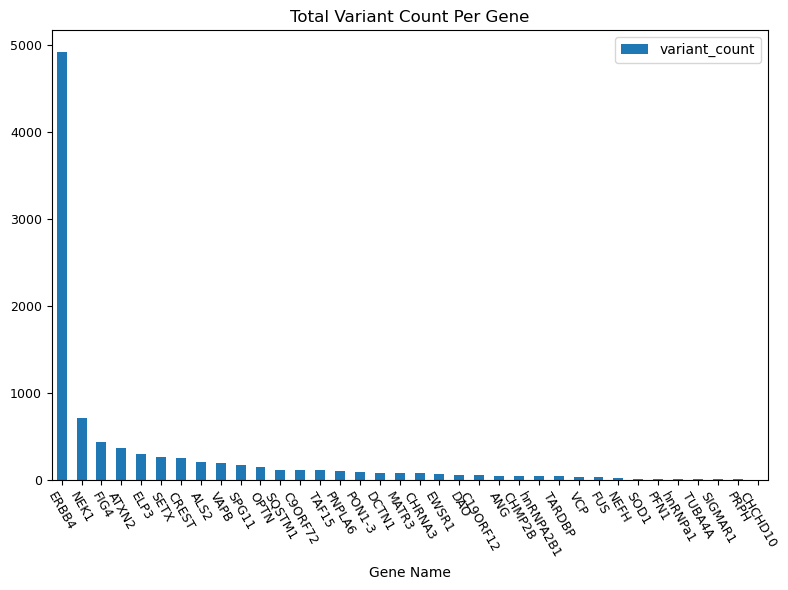

In [31]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [32]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'ATXN2', 'ELP3']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [33]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [34]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [35]:
hdf.reset_index(inplace=True)

In [36]:
hdf.head()

,index,count
0,NA19717,1029
1,NA19676,1293
2,NA19649,1132
3,NA19722,1369
4,NA19648,1297


In [37]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1180.873015873016), 229.44993775883225)

## Find top and bottom genomes using mean & STD

In [38]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [39]:
len(top_genomes)

6

In [40]:
len(bottom_genomes)

10

In [41]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [42]:
sdf.head()

,NA19717,NA19676,NA19649,NA19722,NA19648,NA19764,NA19752,NA19780,NA19756,NA19734,...,NA19773,NA19684,NA19657,NA19663,NA19716,NA19786,NA19746,NA19785,NA19681,NA19732
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,35,46,8,7,10,8,33,4,5,...,3,35,34,31,3,2,1,5,36,2
ANG,8,9,1,3,2,0,1,5,1,10,...,9,9,9,9,4,9,2,2,2,5
ATXN2,13,11,9,155,8,17,20,14,11,12,...,10,7,17,11,14,17,16,1,2,11
C19ORF12,13,14,18,6,9,13,7,7,10,11,...,11,7,4,7,11,9,8,11,13,8
C9ORF72,14,25,1,36,29,35,23,13,12,14,...,10,16,13,12,35,13,20,1,13,26


In [43]:
tgdf= sdf.loc[top_genes]

In [44]:
tgdf_top_genomes = tgdf[top_genomes]

In [45]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [46]:
tgdf_top_genomes.head()

,NA19794,NA19669,NA19679,NA19755,NA19726,NA19663
gene,,,,,,
ERBB4,904,1066,900,928,890,1058
NEK1,191,46,12,11,218,40
FIG4,96,71,56,23,34,39
ATXN2,8,18,165,160,15,11
ELP3,3,33,10,36,9,13


In [47]:
tgdf_bot_genomes.head()

,NA19658,NA19789,NA19792,NA19783,NA19761,NA19735,NA19758,NA19773,NA19786,NA19732
gene,,,,,,,,,,
ERBB4,641,611,381,196,284,255,423,611,215,188
NEK1,13,51,12,217,44,7,6,4,210,5
FIG4,35,28,64,36,40,4,25,19,48,71
ATXN2,10,13,163,12,12,10,8,10,17,11
ELP3,10,32,9,29,8,38,12,19,65,57


## Plot stacked bar chart for top genes & top genomes

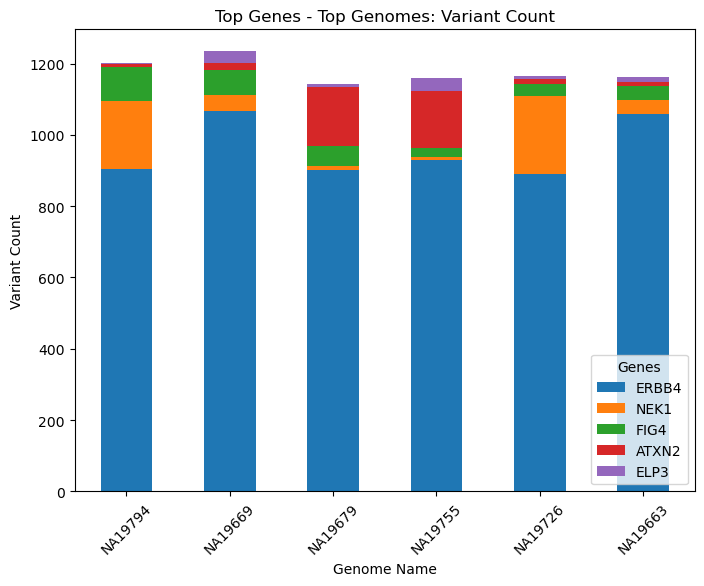

In [48]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

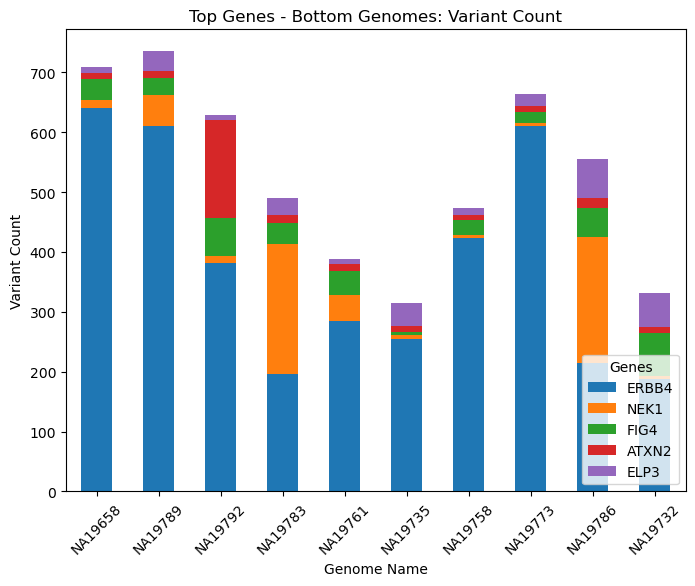

In [49]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()